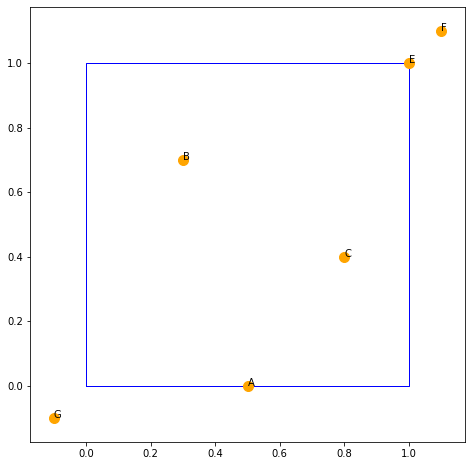

In [17]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# GeoDataFrame representando um polígono
p = {'Ident': 'Polygon A',
    'geometry': Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])}

polygon = gpd.GeoDataFrame([p])

# GeoDataFrame representando pontos
pt = {'Ident': ['A', 'B', 'C', 'E', 'F', 'G'],
    'geometry': [Point(0.5, 0.0),
                Point(0.3, 0.7),
                Point(0.8, 0.4),
                Point(1.0, 1.0),
                Point(1.1, 1.1),
                Point(-0.1, -0.1)]}
points = gpd.GeoDataFrame(pt)

# Plotagem dos dois GeoDataFrames
base = polygon.plot(color='white', edgecolor='blue', figsize=(15, 8))
for i, linha in points.iterrows():
    base.annotate(linha["Ident"], xy=(linha["geometry"].x, linha["geometry"].y))
points.plot(ax=base, color='orange', markersize=100, legend=True)

In [2]:
sjoin = gpd.sjoin(polygon, points, how='inner', op='contains')
sjoin

,Ident_left,geometry,index_right,Ident_right
0,Polygon A,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",1,B
0,Polygon A,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",2,C


In [18]:
sjoin = gpd.sjoin(points, polygon, how='inner', op='within')
sjoin

,Ident_left,geometry,index_right,Ident_right
1,B,POINT (0.30000 0.70000),0,Polygon A
2,C,POINT (0.80000 0.40000),0,Polygon A


In [19]:
sjoin = gpd.sjoin(polygon, points, how='left', op='intersects')
sjoin

,Ident_left,geometry,index_right,Ident_right
0,Polygon A,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",1,B
0,Polygon A,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",0,A
0,Polygon A,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",2,C
0,Polygon A,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",3,E


In [20]:
sjoin = gpd.sjoin(polygon, points, how='right', op='intersects')
sjoin

,index_left,Ident_x,Ident_y,geometry
index_right,,,,
1,0.0,Polygon A,B,POINT (0.30000 0.70000)
0,0.0,Polygon A,A,POINT (0.50000 0.00000)
2,0.0,Polygon A,C,POINT (0.80000 0.40000)
3,0.0,Polygon A,E,POINT (1.00000 1.00000)
4,NaN,NaN,F,POINT (1.10000 1.10000)
5,NaN,NaN,G,POINT (-0.10000 -0.10000)
